In [1]:
import pandas as pd
import string
from tqdm.auto import tqdm, trange
from nltk.stem.snowball import SnowballStemmer 
from nltk import word_tokenize
import nltk
from pandas import DataFrame
from pandas import Series
import re
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv(r'C:\Users\dell\Desktop\pliki\lemm_5632.csv')

df

,date,likes,comments,link to post,postfs,preproccessed,text_prep,text_stem,text_sw,text_lemm
0,2022-01-03,11,210,https://mbasic.facebook.com/groups/32275791783...,Здравствуйте! Планирую открыть счёт в банке PK...,Здравствуйте Планирую открыть счёт в банке PKO...,здравствуйте планирую открыть счёт в банке pko...,планир откр счет банк pko начислен зп подскаже...,планирую открыть счёт банке pko начисления зп ...,планировать открывать счет банк pko начисление...
1,2022-01-03,10,210,https://mbasic.facebook.com/groups/32275791783...,Всем привет. Может у кого-то из вас была такая...,Всем привет Может у кого то из вас была такая ...,всем привет может у кого то из вас была такая ...,ситуац рб числ тунеядец предостав подтвержда,ситуация рб числюсь тунеядец предоставить подт...,ситуация рб числиться тунеядец предоставлять п...
2,2022-01-03,7,70,https://mbasic.facebook.com/groups/32275791783...,Кто может выполнить комплекс строительных рабо...,Кто может выполнить комплекс строительных рабо...,кто может выполнить комплекс строительных рабо...,выполн комплекс строительн работ нов помещен п...,выполнить комплекс строительных работ нового п...,выполнять комплекс строительный помещение пека...
3,2022-01-03,11,220,https://mbasic.facebook.com/groups/32275791783...,"енно). Вообще, человек из жкх сказал, что обыч...",енно Вообще человек из жкх сказал что обычно е...,енно вообще человек из жкх сказал что обычно е...,ен жкх присыла как справк польск налогов подтв...,енно жкх присылают какие справки польской нало...,енное жкх присылать справка польский налоговый...
4,2022-01-04,12,0,https://mbasic.facebook.com/groups/32275791783...,"Кто еще в раздумьях и не знает, какую полициал...",Кто еще в раздумьях и не знает какую полициаль...,кто еще в раздумьях и не знает какую полициаль...,раздум как полициальн школ выбра start центр в...,раздумьях какую полициальную школу выбрать sta...,раздумье полициальный выбирать start центр вар...
...,...,...,...,...,...,...,...,...,...,...
5627,2022-07-21,24,30,https://mbasic.facebook.com/groups/32275791783...,"Здравствуйте, произошла очень неприятная ситуа...",Здравствуйте произошла очень неприятная ситуац...,здравствуйте произошла очень неприятная ситуац...,произошл неприятн ситуац автовокзал заходн сес...,произошла неприятная ситуация автовокзале захо...,происходить неприятный ситуация автовокзал зах...
5628,2022-07-21,1,40,https://mbasic.facebook.com/groups/32275791783...,"Подскажите пожалуйста,из Тересполя в Брест,кро...",Подскажите пожалуйста из Тересполя в Брест кро...,подскажите пожалуйста из тересполя в брест кро...,подскаж тереспол брест автобус езд как маршрут...,подскажите тересполя брест автобуса ездят каки...,тересполь брест автобус ездить маршрутка приез...
5629,2022-07-21,0,40,https://mbasic.facebook.com/groups/32275791783...,"Добрый день, кто-нибудь знает, можно ли привит...",Добрый день кто нибудь знает можно ли привить ...,добрый день кто нибудь знает можно ли привить ...,прив covid желательн pfizer ’ ом родител нац виз,привить covid желательно pfizer ’ ом родителей...,прививать covid желательно pfizer ’ ом родит...
5630,2022-07-21,1,40,https://mbasic.facebook.com/groups/32275791783...,"Добрага дня, шаноўныя ! Можа тут нехта працуе ...",Добрага дня шаноўныя Можа тут нехта працуе ў т...,добрага дня шаноўныя можа тут нехта працуе ў т...,добраг дня шаноўны мож нехт працу турыстычн аг...,добрага дня шаноўныя можа нехта працуе турысты...,добрага шаноўныя можа нехт працуй турыстычный ...


In [2]:
import nltk
import pycountry
from nltk.stem import SnowballStemmer
nltk.download('crubadan')

[nltk_data] Downloading package crubadan to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package crubadan is already up-to-date!


True

In [3]:
tc = nltk.classify.textcat.TextCat() 

In [4]:
df['language_tc'] = df['postfs'].apply(lambda x: tc.guess_language(x))

In [5]:
df

,date,likes,comments,link to post,postfs,preproccessed,text_prep,text_stem,text_sw,text_lemm,language_tc
0,2022-01-03,11,210,https://mbasic.facebook.com/groups/32275791783...,Здравствуйте! Планирую открыть счёт в банке PK...,Здравствуйте Планирую открыть счёт в банке PKO...,здравствуйте планирую открыть счёт в банке pko...,планир откр счет банк pko начислен зп подскаже...,планирую открыть счёт банке pko начисления зп ...,планировать открывать счет банк pko начисление...,rus
1,2022-01-03,10,210,https://mbasic.facebook.com/groups/32275791783...,Всем привет. Может у кого-то из вас была такая...,Всем привет Может у кого то из вас была такая ...,всем привет может у кого то из вас была такая ...,ситуац рб числ тунеядец предостав подтвержда,ситуация рб числюсь тунеядец предоставить подт...,ситуация рб числиться тунеядец предоставлять п...,rus
2,2022-01-03,7,70,https://mbasic.facebook.com/groups/32275791783...,Кто может выполнить комплекс строительных рабо...,Кто может выполнить комплекс строительных рабо...,кто может выполнить комплекс строительных рабо...,выполн комплекс строительн работ нов помещен п...,выполнить комплекс строительных работ нового п...,выполнять комплекс строительный помещение пека...,rus
3,2022-01-03,11,220,https://mbasic.facebook.com/groups/32275791783...,"енно). Вообще, человек из жкх сказал, что обыч...",енно Вообще человек из жкх сказал что обычно е...,енно вообще человек из жкх сказал что обычно е...,ен жкх присыла как справк польск налогов подтв...,енно жкх присылают какие справки польской нало...,енное жкх присылать справка польский налоговый...,rus
4,2022-01-04,12,0,https://mbasic.facebook.com/groups/32275791783...,"Кто еще в раздумьях и не знает, какую полициал...",Кто еще в раздумьях и не знает какую полициаль...,кто еще в раздумьях и не знает какую полициаль...,раздум как полициальн школ выбра start центр в...,раздумьях какую полициальную школу выбрать sta...,раздумье полициальный выбирать start центр вар...,rus
...,...,...,...,...,...,...,...,...,...,...,...
5627,2022-07-21,24,30,https://mbasic.facebook.com/groups/32275791783...,"Здравствуйте, произошла очень неприятная ситуа...",Здравствуйте произошла очень неприятная ситуац...,здравствуйте произошла очень неприятная ситуац...,произошл неприятн ситуац автовокзал заходн сес...,произошла неприятная ситуация автовокзале захо...,происходить неприятный ситуация автовокзал зах...,rus
5628,2022-07-21,1,40,https://mbasic.facebook.com/groups/32275791783...,"Подскажите пожалуйста,из Тересполя в Брест,кро...",Подскажите пожалуйста из Тересполя в Брест кро...,подскажите пожалуйста из тересполя в брест кро...,подскаж тереспол брест автобус езд как маршрут...,подскажите тересполя брест автобуса ездят каки...,тересполь брест автобус ездить маршрутка приез...,rus
5629,2022-07-21,0,40,https://mbasic.facebook.com/groups/32275791783...,"Добрый день, кто-нибудь знает, можно ли привит...",Добрый день кто нибудь знает можно ли привить ...,добрый день кто нибудь знает можно ли привить ...,прив covid желательн pfizer ’ ом родител нац виз,привить covid желательно pfizer ’ ом родителей...,прививать covid желательно pfizer ’ ом родит...,rus
5630,2022-07-21,1,40,https://mbasic.facebook.com/groups/32275791783...,"Добрага дня, шаноўныя ! Можа тут нехта працуе ...",Добрага дня шаноўныя Можа тут нехта працуе ў т...,добрага дня шаноўныя можа тут нехта працуе ў т...,добраг дня шаноўны мож нехт працу турыстычн аг...,добрага дня шаноўныя можа нехта працуе турысты...,добрага шаноўныя можа нехт працуй турыстычный ...,bel


In [6]:
count = df['language_tc'].value_counts()
display(count)

rus     4858
bel      596
pol      118
ukr       38
bul       10
eng        9
eng        2
kat        1
Name: language_tc, dtype: int64

<AxesSubplot:ylabel='language_tc'>

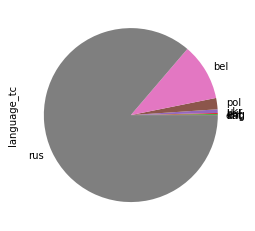

In [7]:
df.language_tc.value_counts().sort_values().plot(kind='pie')

In [8]:
df.loc[df['language_tc'] == 'eng']

,date,likes,comments,link to post,postfs,preproccessed,text_prep,text_stem,text_sw,text_lemm,language_tc
1375,2022-03-01,0,0,https://mbasic.facebook.com/groups/32275791783...,One reason could be the toothlessness and soft...,One reason could be the toothlessness and soft...,one reason could be the toothlessness and soft...,one reason could be the toothlessness and soft...,one reason could be the toothlessness and soft...,one reason could be the toothlessness and soft...,eng
1494,2022-03-04,2,10,https://mbasic.facebook.com/groups/32275791783...,"Напрашиваются параллелиBut in the past week, w...",Напрашиваются параллелиBut in the past week we...,напрашиваются параллелиbut in the past week we...,напрашива параллелибут in the past week we ve ...,напрашиваются параллелиbut in the past week we...,напрашиваться параллелиbut in the past week we...,eng
2337,2022-04-03,0,0,https://mbasic.facebook.com/groups/32275791783...,European Union President Charles Michel launch...,European Union President Charles Michel launch...,european union president charles michel launch...,european union president charles michel launch...,european union president charles michel launch...,european union president charles michel launch...,eng
2503,2022-04-07,54,40,https://mbasic.facebook.com/groups/32275791783...,Pink Floyd опубликовали трек в поддержку Украи...,Pink Floyd опубликовали трек в поддержку Украи...,pink floyd опубликовали трек в поддержку украи...,pink floyd опубликова трек поддержк украин hey...,pink floyd опубликовали трек поддержку украины...,pink floyd опубликовывать трек поддержка украи...,eng
3343,2022-05-04,7,0,https://mbasic.facebook.com/groups/32275791783...,"Good day. It's me again, but already with good...",Good day It s me again but already with good n...,good day it s me again but already with good n...,good day it s me again but already with good n...,good day it s me again but already with good n...,good day it s me again but already with good n...,eng
3490,2022-05-10,16,30,https://mbasic.facebook.com/groups/32275791783...,"KUPIĘ BUSA.. ŻEBY JEŹDZIŁ I HAMOWAŁ , ŻEBY DRO...",KUPIĘ BUSA ŻEBY JEŹDZIŁ I HAMOWAŁ ŻEBY DROGI N...,kupię busa żeby jeździł i hamował żeby drogi n...,купиę busa żеб jеźдзиł i hамоwаł żеб drogi nie...,kupię busa żeby jeździł i hamował żeby drogi n...,kupię busa żeby jeździł i hamował żeby drogi n...,eng
3506,2022-05-10,0,0,https://mbasic.facebook.com/groups/32275791783...,EN: Are you from Belarus or Georgia? Do you wa...,EN Are you from Belarus or Georgia Do you want...,en are you from belarus or georgia do you want...,en are you from belarus or georgia do you want...,en are you from belarus or georgia do you want...,en are you from belarus or georgia do you want...,eng
3654,2022-05-15,0,0,https://mbasic.facebook.com/groups/32275791783...,Please HELP the mother of a volunteer who is f...,Please HELP the mother of a volunteer who is f...,please help the mother of a volunteer who is f...,please help the mother of a volunteer who is f...,please help the mother of a volunteer who is f...,please help the mother of a volunteer who is f...,eng
4221,2022-05-31,0,0,https://mbasic.facebook.com/groups/32275791783...,Hi everyone! I'm Mark CCO 4fix agency. We work...,Hi everyone I m Mark CCO fix agency We work wi...,hi everyone i m mark cco fix agency we work wi...,hi everyone i m mark cco fix agency we work wi...,hi everyone i m mark cco fix agency we work wi...,hi everyone i m mark cco fix agency we work wi...,eng


In [9]:
df.loc[df['language_tc'] == 'kat']

,date,likes,comments,link to post,postfs,preproccessed,text_prep,text_stem,text_sw,text_lemm,language_tc
5351,2022-07-13,2,0,https://mbasic.facebook.com/groups/32275791783...,". რეპეტიტორობა მოიცავს ბიოლოგიის, ქიმიის, მათე...",რეპეტიტორობა მოიცავს ბიოლოგიის ქიმიის მათემატ...,რეპეტიტორობა მოიცავს ბიოლოგიის ქიმიის მათემატ...,რეპეტიტორობა მოიცავს ბიოლოგიის ქიმიის მათემატი...,რეპეტიტორობა მოიცავს ბიოლოგიის ქიმიის მათემატი...,რეპეტიტორობა მოიცავს ბიოლოგიის ქიმიის მათემატი...,kat


In [10]:
#df.to_csv('lang_tc.csv')

In [11]:
df

,date,likes,comments,link to post,postfs,preproccessed,text_prep,text_stem,text_sw,text_lemm,language_tc
0,2022-01-03,11,210,https://mbasic.facebook.com/groups/32275791783...,Здравствуйте! Планирую открыть счёт в банке PK...,Здравствуйте Планирую открыть счёт в банке PKO...,здравствуйте планирую открыть счёт в банке pko...,планир откр счет банк pko начислен зп подскаже...,планирую открыть счёт банке pko начисления зп ...,планировать открывать счет банк pko начисление...,rus
1,2022-01-03,10,210,https://mbasic.facebook.com/groups/32275791783...,Всем привет. Может у кого-то из вас была такая...,Всем привет Может у кого то из вас была такая ...,всем привет может у кого то из вас была такая ...,ситуац рб числ тунеядец предостав подтвержда,ситуация рб числюсь тунеядец предоставить подт...,ситуация рб числиться тунеядец предоставлять п...,rus
2,2022-01-03,7,70,https://mbasic.facebook.com/groups/32275791783...,Кто может выполнить комплекс строительных рабо...,Кто может выполнить комплекс строительных рабо...,кто может выполнить комплекс строительных рабо...,выполн комплекс строительн работ нов помещен п...,выполнить комплекс строительных работ нового п...,выполнять комплекс строительный помещение пека...,rus
3,2022-01-03,11,220,https://mbasic.facebook.com/groups/32275791783...,"енно). Вообще, человек из жкх сказал, что обыч...",енно Вообще человек из жкх сказал что обычно е...,енно вообще человек из жкх сказал что обычно е...,ен жкх присыла как справк польск налогов подтв...,енно жкх присылают какие справки польской нало...,енное жкх присылать справка польский налоговый...,rus
4,2022-01-04,12,0,https://mbasic.facebook.com/groups/32275791783...,"Кто еще в раздумьях и не знает, какую полициал...",Кто еще в раздумьях и не знает какую полициаль...,кто еще в раздумьях и не знает какую полициаль...,раздум как полициальн школ выбра start центр в...,раздумьях какую полициальную школу выбрать sta...,раздумье полициальный выбирать start центр вар...,rus
...,...,...,...,...,...,...,...,...,...,...,...
5627,2022-07-21,24,30,https://mbasic.facebook.com/groups/32275791783...,"Здравствуйте, произошла очень неприятная ситуа...",Здравствуйте произошла очень неприятная ситуац...,здравствуйте произошла очень неприятная ситуац...,произошл неприятн ситуац автовокзал заходн сес...,произошла неприятная ситуация автовокзале захо...,происходить неприятный ситуация автовокзал зах...,rus
5628,2022-07-21,1,40,https://mbasic.facebook.com/groups/32275791783...,"Подскажите пожалуйста,из Тересполя в Брест,кро...",Подскажите пожалуйста из Тересполя в Брест кро...,подскажите пожалуйста из тересполя в брест кро...,подскаж тереспол брест автобус езд как маршрут...,подскажите тересполя брест автобуса ездят каки...,тересполь брест автобус ездить маршрутка приез...,rus
5629,2022-07-21,0,40,https://mbasic.facebook.com/groups/32275791783...,"Добрый день, кто-нибудь знает, можно ли привит...",Добрый день кто нибудь знает можно ли привить ...,добрый день кто нибудь знает можно ли привить ...,прив covid желательн pfizer ’ ом родител нац виз,привить covid желательно pfizer ’ ом родителей...,прививать covid желательно pfizer ’ ом родит...,rus
5630,2022-07-21,1,40,https://mbasic.facebook.com/groups/32275791783...,"Добрага дня, шаноўныя ! Можа тут нехта працуе ...",Добрага дня шаноўныя Можа тут нехта працуе ў т...,добрага дня шаноўныя можа тут нехта працуе ў т...,добраг дня шаноўны мож нехт працу турыстычн аг...,добрага дня шаноўныя можа нехта працуе турысты...,добрага шаноўныя можа нехт працуй турыстычный ...,bel


In [12]:
import seaborn as sns


<Figure size 1440x720 with 0 Axes>

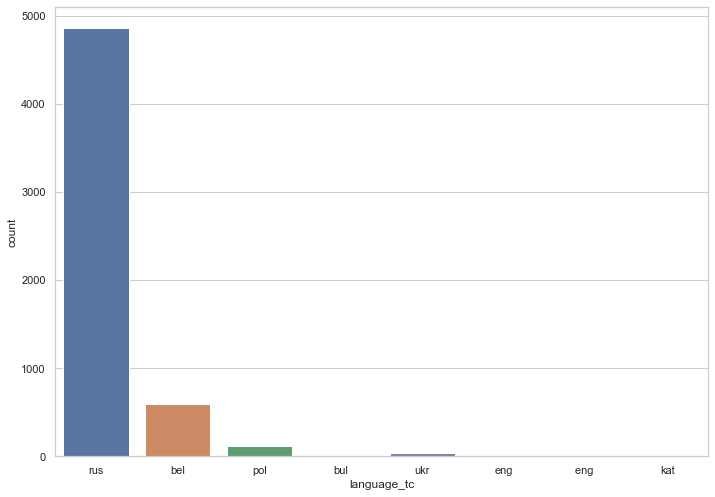

<Figure size 1440x720 with 0 Axes>

In [17]:
sns.set_theme(style="whitegrid")
fig, x = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(x=df['language_tc'])
plt.figure(figsize=(20,10))



In [18]:
posts = df['postfs']

In [19]:
posts

0       Здравствуйте! Планирую открыть счёт в банке PK...
1       Всем привет. Может у кого-то из вас была такая...
2       Кто может выполнить комплекс строительных рабо...
3       енно). Вообще, человек из жкх сказал, что обыч...
4       Кто еще в раздумьях и не знает, какую полициал...
                              ...                        
5627    Здравствуйте, произошла очень неприятная ситуа...
5628    Подскажите пожалуйста,из Тересполя в Брест,кро...
5629    Добрый день, кто-нибудь знает, можно ли привит...
5630    Добрага дня, шаноўныя ! Можа тут нехта працуе ...
5631    Всем привет Подскажите, где оформить доверенно...
Name: postfs, Length: 5632, dtype: object

In [20]:
from langdetect import detect
df['lang_detect'] = df['postfs'].apply(detect)

In [21]:
df


,date,likes,comments,link to post,postfs,preproccessed,text_prep,text_stem,text_sw,text_lemm,language_tc,lang_detect
0,2022-01-03,11,210,https://mbasic.facebook.com/groups/32275791783...,Здравствуйте! Планирую открыть счёт в банке PK...,Здравствуйте Планирую открыть счёт в банке PKO...,здравствуйте планирую открыть счёт в банке pko...,планир откр счет банк pko начислен зп подскаже...,планирую открыть счёт банке pko начисления зп ...,планировать открывать счет банк pko начисление...,rus,ru
1,2022-01-03,10,210,https://mbasic.facebook.com/groups/32275791783...,Всем привет. Может у кого-то из вас была такая...,Всем привет Может у кого то из вас была такая ...,всем привет может у кого то из вас была такая ...,ситуац рб числ тунеядец предостав подтвержда,ситуация рб числюсь тунеядец предоставить подт...,ситуация рб числиться тунеядец предоставлять п...,rus,ru
2,2022-01-03,7,70,https://mbasic.facebook.com/groups/32275791783...,Кто может выполнить комплекс строительных рабо...,Кто может выполнить комплекс строительных рабо...,кто может выполнить комплекс строительных рабо...,выполн комплекс строительн работ нов помещен п...,выполнить комплекс строительных работ нового п...,выполнять комплекс строительный помещение пека...,rus,ru
3,2022-01-03,11,220,https://mbasic.facebook.com/groups/32275791783...,"енно). Вообще, человек из жкх сказал, что обыч...",енно Вообще человек из жкх сказал что обычно е...,енно вообще человек из жкх сказал что обычно е...,ен жкх присыла как справк польск налогов подтв...,енно жкх присылают какие справки польской нало...,енное жкх присылать справка польский налоговый...,rus,ru
4,2022-01-04,12,0,https://mbasic.facebook.com/groups/32275791783...,"Кто еще в раздумьях и не знает, какую полициал...",Кто еще в раздумьях и не знает какую полициаль...,кто еще в раздумьях и не знает какую полициаль...,раздум как полициальн школ выбра start центр в...,раздумьях какую полициальную школу выбрать sta...,раздумье полициальный выбирать start центр вар...,rus,ru
...,...,...,...,...,...,...,...,...,...,...,...,...
5627,2022-07-21,24,30,https://mbasic.facebook.com/groups/32275791783...,"Здравствуйте, произошла очень неприятная ситуа...",Здравствуйте произошла очень неприятная ситуац...,здравствуйте произошла очень неприятная ситуац...,произошл неприятн ситуац автовокзал заходн сес...,произошла неприятная ситуация автовокзале захо...,происходить неприятный ситуация автовокзал зах...,rus,ru
5628,2022-07-21,1,40,https://mbasic.facebook.com/groups/32275791783...,"Подскажите пожалуйста,из Тересполя в Брест,кро...",Подскажите пожалуйста из Тересполя в Брест кро...,подскажите пожалуйста из тересполя в брест кро...,подскаж тереспол брест автобус езд как маршрут...,подскажите тересполя брест автобуса ездят каки...,тересполь брест автобус ездить маршрутка приез...,rus,ru
5629,2022-07-21,0,40,https://mbasic.facebook.com/groups/32275791783...,"Добрый день, кто-нибудь знает, можно ли привит...",Добрый день кто нибудь знает можно ли привить ...,добрый день кто нибудь знает можно ли привить ...,прив covid желательн pfizer ’ ом родител нац виз,привить covid желательно pfizer ’ ом родителей...,прививать covid желательно pfizer ’ ом родит...,rus,ru
5630,2022-07-21,1,40,https://mbasic.facebook.com/groups/32275791783...,"Добрага дня, шаноўныя ! Можа тут нехта працуе ...",Добрага дня шаноўныя Можа тут нехта працуе ў т...,добрага дня шаноўныя можа тут нехта працуе ў т...,добраг дня шаноўны мож нехт працу турыстычн аг...,добрага дня шаноўныя можа нехта працуе турысты...,добрага шаноўныя можа нехт працуй турыстычный ...,bel,uk


In [94]:
count = df['lang_detect'].value_counts()
display(count)

ru    5055
uk     441
pl     115
bg      10
en      10
et       1
Name: lang_detect, dtype: int64

<AxesSubplot:ylabel='lang_detect'>

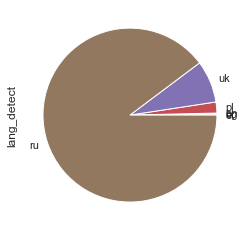

In [95]:
df.lang_detect.value_counts().sort_values().plot(kind='pie')

<AxesSubplot:xlabel='lang_detect', ylabel='count'>

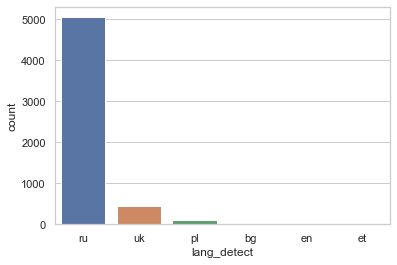

In [96]:
sns.countplot(x=df['lang_detect'])

In [97]:
#import googletrans 


In [98]:
#from googletrans import Translator